In [1]:
!pip install pandas numpy matplotlib scikit-learn seaborn

In [21]:
%load_ext autoreload
%autoreload 2
from pathlib import Path 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from glob import glob
import itertools
from functools import lru_cache, cache
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import seaborn as sns; sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from Dataset import dataset

In [7]:
#X_ = dataset.sonde_week("Marseille_01")
X = dataset.X_week()

pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 1, 4, 0), x: 2, weekday : 2, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 2, 4, 0), x: 14, weekday : 3, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 3, 4, 0), x: 26, weekday : 4, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 4, 4, 0), x: 38, weekday : 5, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 5, 4, 0), x: 50, weekday : 6, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 6, 4, 0), x: 62, weekday : 0, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 7, 4, 0), x: 74, weekday : 1, hour : 4, len : 0
pb pour sonde Marseille_02, avec datetiems datetime.datetime(2020, 1, 1, 4, 0), x: 2, weekday : 2, hour : 4, len : 0
pb pour sonde Marseille_02, avec datetiems datetime.dateti

In [15]:
for x, y in np.argwhere(np.isnan(X)):
    removed_nan = X[:, y][~np.isnan(X[:, y])]
    X[x, y] = np.median(removed_nan) # on remplace les missing value par la médiane

In [ ]:
dataset.measure_df[(self.measure_df["numero"]==sonde) & (self.measure_df["weekday"]==2)]["hour"].unique()

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Anaylse PCA

In [19]:
pca = PCA(n_components=2)
data_proj = pca.fit_transform(X_scaled)

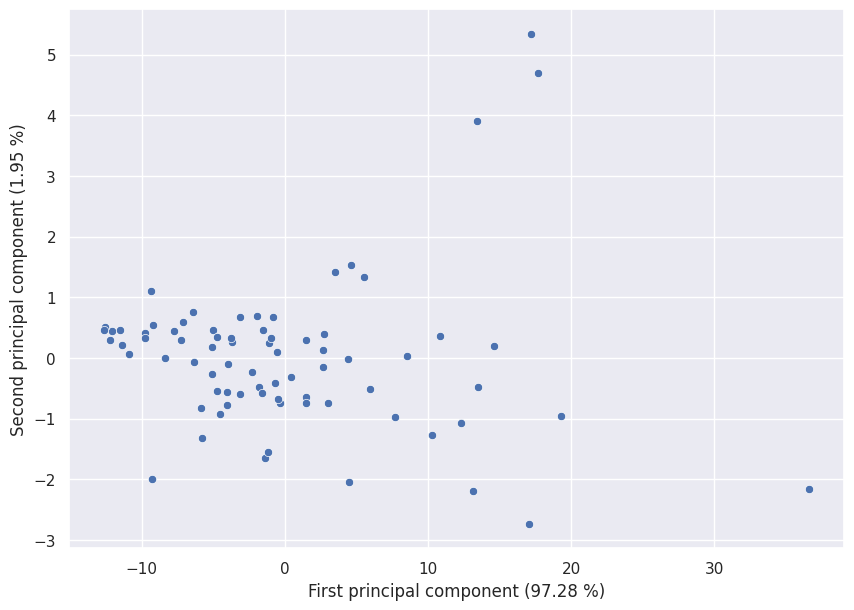

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_proj[:, 0], y=data_proj[:, 1])
plt.title("")
plt.xlabel(f"First principal component ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)")
plt.ylabel(f"Second principal component ({round(pca.explained_variance_ratio_[1]* 100, 2)} %)")
plt.show()

/tmp/ipykernel_210/1169315954.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmax' will be ignored
  ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9)


Text(0.5, 1.0, 'Position of the cities in France')

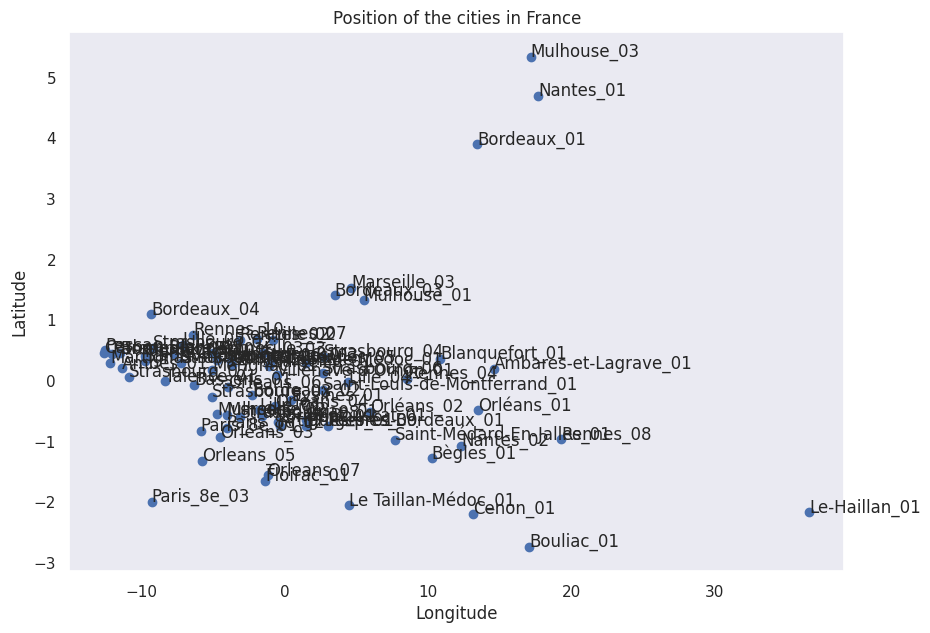

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9)
for i, name in enumerate(dataset.sondes_names):
    ax.annotate(name, (data_proj[i, 0], data_proj[i, 1]))
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Position of the cities in France')

In [29]:
12* 7

84